# Convolutional Neural Networks for Image Classification

**This notebook shows how to create a CNN model for image classification with TensorFlow 2 and Keras**

## The Data

We will be using the CIFAR10 dataset from [Keras](https://keras.io/api/datasets/cifar10/).

**Information**

For this tutorial, we will use the CIFAR10 dataset. It has 10 classes: `airplane`, `automobile`, `bird`, `cat`, `deer`, `dog`, `frog`, `horse`, `ship`, `truck`. The images in CIFAR10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size. See more info at the [CIFAR homepage](https://keras.io/api/datasets/cifar10/).

## Table of Contents
- ### [Python libraries](#libraries)
- ### [Data exploration](#exploration)
    - #### [Read tha data](#read)
    - #### [Visualize the data](#visualize)
- ### [Data pre-processing](#pre-processing)
    - #### [Normalize the data](#normalize)
    - #### [Label encoding](#label)
- ### [Create the model](#model)
- ### [Train the model](#train)
    - #### [Check if the model overfits](#overfit)
    - #### [Improve the model with `BatchNormalization` and `Dropout` layers](#improve)
- ### [Evaluate the model](#evaluate)
- ### [Predicting a given image](#predict)

<a id='libraries'></a>
## Python libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<a id='exploration'></a>
## Data exploration

<a id='read'></a>
### Read tha data

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

<a id='visualize'></a>
###  Visualize the data

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

 frog, truck, truck,  deer,   car,   car,  bird, horse,  ship,   cat


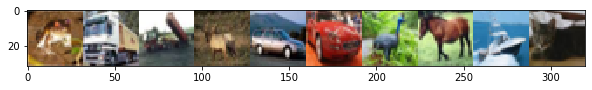

In [6]:
plot = []
for i in range(10):
    if i==0:
        plot = x_train[i,:,:,:]
    else:
        plot = np.append(plot, x_train[i,:,:,:], axis=1)

plt.figure(figsize=(10,5))
plt.imshow(plot)

# print labels
labels = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(', '.join('%5s' % labels[int(y_train[j])] for j in range(10)))

<a id='pre-processing'></a>
## Data pre-processing 

<a id='normalize'></a>
### Normalize the data 

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
print('Min/max values:', x_train.min(), '/', x_train.max())

Min/max values: 0 / 255


In [9]:
x_train = x_train/225
x_test = x_test/255

<a id='label'></a>
### Label encoding 

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train[:5,:]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

We have numbers for each label. We need to encode the categories as a one-hot numeric array so our CNN can understand them. We can do that by usinf the `to_categorical` function from keras

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train_onehot = to_categorical(y_train,10)
y_test_onehot = to_categorical(y_test,10)

In [14]:
y_train.shape

(50000, 1)

In [15]:
y_train[:5,:]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

<a id='model'></a>
## Create the model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [17]:
model = Sequential()

## First set of layers
# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))

## Second set of layers
# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
#  Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))

## The Multilayer Perceptron Classifiers
# Flatten images from 8X8X32 to 2048
model.add(Flatten())
# Desnse layer with 512 neurons
model.add(Dense(1024, activation='relu'))
# Desnse layer with 512 neurons
model.add(Dense(512, activation='relu'))
# Desnse layer with 256 neurons
model.add(Dense(256, activation='relu'))
# Desnse layer with 128 neurons
model.add(Dense(128, activation='relu'))
# Last layer with the 10 possible classes
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               5

<a id='train'></a>
## Train the model

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [21]:
model.fit(x_train, y_train_onehot, epochs=10,
          validation_data=(x_test,y_test_onehot),
          callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 65s 1ms/sample - loss: 1.4129 - accuracy: 0.4822 - val_loss: 1.1183 - val_accuracy: 0.5995
Epoch 2/10
50000/50000 [==============================] - 63s 1ms/sample - loss: 1.0087 - accuracy: 0.6463 - val_loss: 0.9512 - val_accuracy: 0.6696
Epoch 3/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.8090 - accuracy: 0.7169 - val_loss: 0.9396 - val_accuracy: 0.6820
Epoch 4/10
50000/50000 [==============================] - 62s 1ms/sample - loss: 0.6361 - accuracy: 0.7787 - val_loss: 0.9807 - val_accuracy: 0.6764
Epoch 5/10
50000/50000 [==============================] - 63s 1ms/sample - loss: 0.4819 - accuracy: 0.8323 - val_loss: 0.8906 - val_accuracy: 0.7103
Epoch 6/10
50000/50000 [==============================] - 62s 1ms/sample - loss: 0.3556 - accuracy: 0.8765 - val_loss: 1.0304 - val_accuracy: 0.7010
Epoch 7/10
50000/50000 [==============================] 

<a id='overfit'></a>
### Check if the model overfits:

- **Plot loss**

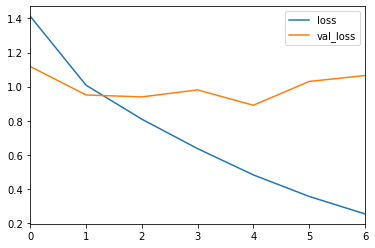

In [22]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss', 'val_loss']].plot()

- **Plot accuracy**

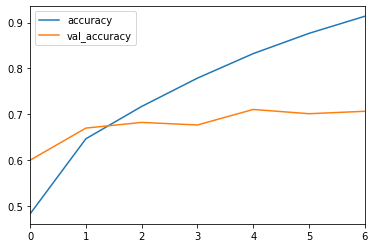

In [23]:
metrics[['accuracy', 'val_accuracy']].plot()

In [24]:
print(model.metrics_names)
print(model.evaluate(x_test,y_test_onehot,verbose=0))

['loss', 'accuracy']
[1.0650287547111512, 0.7063]


<a id='improve'></a>
### Improve the model with [`BatchNormalization`](https://en.wikipedia.org/wiki/Batch_normalization) and [`Dropout`](https://en.wikipedia.org/wiki/Dilution_(neural_networks)) layers

In [28]:
from tensorflow.keras.layers import Activation, BatchNormalization, Dropout

In [34]:
model = Sequential()

## First set of layers
# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

## Second set of layers
# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
#  Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

## The Multilayer Perceptron Classifiers
# Flatten images from 8X8X32 to 2048
model.add(Flatten())
# Desnse layer with 512 neurons
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
# Desnse layer with 512 neurons
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
# Desnse layer with 256 neurons
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
# Desnse layer with 128 neurons
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
# Last layer with the 10 possible classes
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
model.fit(x_train, y_train_onehot, epochs=25,
          validation_data=(x_test,y_test_onehot),
          callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 109s 2ms/sample - loss: 1.7119 - accuracy: 0.3722 - val_loss: 1.4029 - val_accuracy: 0.5095
Epoch 2/25
50000/50000 [==============================] - 99s 2ms/sample - loss: 1.3628 - accuracy: 0.5166 - val_loss: 1.3496 - val_accuracy: 0.5057
Epoch 3/25
50000/50000 [==============================] - 99s 2ms/sample - loss: 1.2284 - accuracy: 0.5706 - val_loss: 1.3828 - val_accuracy: 0.5455
Epoch 4/25
50000/50000 [==============================] - 99s 2ms/sample - loss: 1.1444 - accuracy: 0.6040 - val_loss: 1.1913 - val_accuracy: 0.5692
Epoch 5/25
50000/50000 [==============================] - 98s 2ms/sample - loss: 1.0800 - accuracy: 0.6277 - val_loss: 1.0259 - val_accuracy: 0.6423
Epoch 6/25
50000/50000 [==============================] - 100s 2ms/sample - loss: 1.0334 - accuracy: 0.6472 - val_loss: 1.0188 - val_accuracy: 0.6484
Epoch 7/25
50000/50000 [==============================

- **Plot loss**

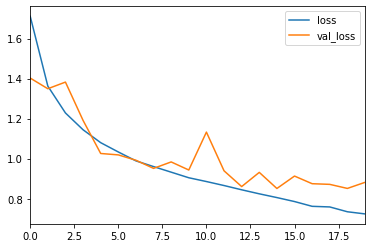

In [36]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss', 'val_loss']].plot()

- **Plot accuracy**

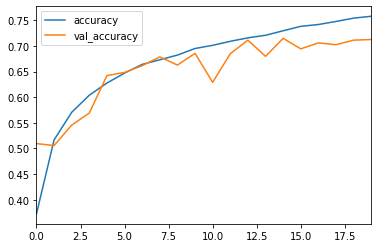

In [37]:
metrics[['accuracy', 'val_accuracy']].plot()

<a id='evaluate'></a>
## Evaluate the model

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
predictions = model.predict_classes(x_test)

In [41]:
y_test[0]

array([3], dtype=uint8)

In [42]:
predictions[0]

3

**[Precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall)**

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      1000
           1       0.88      0.83      0.85      1000
           2       0.61      0.58      0.59      1000
           3       0.45      0.61      0.52      1000
           4       0.67      0.67      0.67      1000
           5       0.56      0.69      0.62      1000
           6       0.76      0.79      0.77      1000
           7       0.87      0.69      0.77      1000
           8       0.85      0.82      0.83      1000
           9       0.87      0.76      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.73      0.71      0.72     10000
weighted avg       0.73      0.71      0.72     10000



**[Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)**

In [44]:
confusion_matrix(y_test,predictions)

array([[695,  11,  84,  62,  32,  13,  10,   9,  71,  13],
       [ 10, 828,  15,  30,   2,   5,  19,   1,  23,  67],
       [ 47,   2, 577, 102,  90,  95,  60,  17,   8,   2],
       [  6,   3,  51, 615,  37, 209,  58,  14,   4,   3],
       [  9,   2,  72,  94, 671,  63,  56,  29,   4,   0],
       [  5,   3,  34, 190,  38, 690,  19,  17,   3,   1],
       [  1,   2,  47,  89,  32,  39, 789,   0,   1,   0],
       [  6,   0,  39,  71,  88,  93,   5, 687,   1,  10],
       [ 37,  16,  21,  60,   9,   8,  15,   2, 817,  15],
       [ 35,  71,   7,  61,   9,  10,  10,  11,  28, 758]])

**Heatmap**

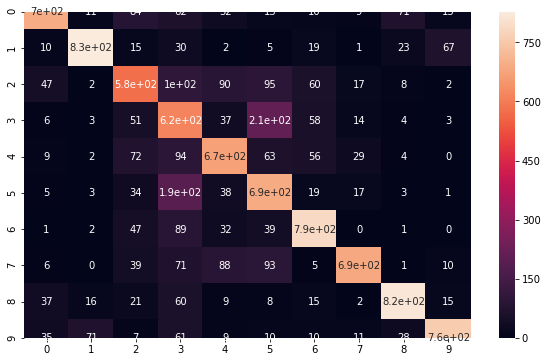

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

<a id='predict'></a>
## Predicting a given image

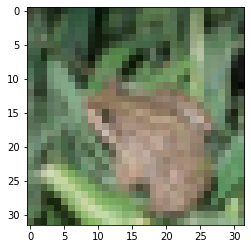

In [54]:
image = x_test[4]
plt.imshow(image)

In [61]:
print("The model says it's a", labels[int(model.predict_classes(image.reshape(1,32,32,3)))])

The model says it's a frog
